In [ ]:
# Problem Statement: I have been asked to predict whether customer will purchase a health insurance policy or not based on 
# data provided.

In [ ]:
# Steps involved in solving this problem are:
# 1. Importing relevant libraries
# 2. Reading files in notebook
# 3. Data inspection
# 4. Data prepration
# 5. EDA of Data
# 6. Building model
# 7. Choosing the best model for submission
# 8. make submission


In [1]:
# Importing required libraries and modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# importing operating system to read files and providing path where my files are located
import os
os.chdir(r"C:\Users\meebh\iim materials\job-hackthon\analytics vidya marathon")

In [3]:
# reading files and saving it as dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# train dataset is for training my model
# test dataset used for making predictions using model

In [4]:
# Inspecting dataset 
train.head(10)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [5]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [5]:
# digging little dipper into my df
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [6]:
## I have total 14 columns and 50882 rows in my dataset

In [7]:
# Checking if my data has any null value
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [ ]:
# Health Indicator, Holding_Policy_Duration, Holding_Policy_Type column have missing values 22.976691,39.799929, 39.799929
# respectively.

In [9]:
train['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [ ]:
# this column has categorical variable.

In [4]:
# imputing missing values with mode in the column

train["Health Indicator"] = train["Health Indicator"].fillna(train["Health Indicator"].mode()[0])

In [11]:
train['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [ ]:
# this column has categorical variables therefore use mode to impute missing values

In [5]:
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].fillna(train["Holding_Policy_Duration"].mode()[0])

In [13]:
train['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [ ]:
# this column has integer values therefore using mean for imputing missing values is a good choice.

In [6]:
train["Holding_Policy_Type"] = train["Holding_Policy_Type"].fillna(train["Holding_Policy_Type"].mean())

In [15]:
train.isnull().sum()/train.shape[0] *100

ID                         0.0
City_Code                  0.0
Region_Code                0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
Response                   0.0
dtype: float64

In [ ]:
# now i have no missing value in my train dataset.

In [16]:
test.isnull().sum()/test.shape[0] *100    # checking null values in test df

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [17]:
# Health Indicator, Holding_Policy_Duration, Holding_Policy_Type column have missing values 22.976691,39.799929, 39.799929
# respectively.

In [7]:
# using mode value for filling missing values
test["Health Indicator"] = test["Health Indicator"].fillna(test["Health Indicator"].mode()[0])

In [8]:
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].fillna(test["Holding_Policy_Duration"].mode()[0])

In [9]:
test["Holding_Policy_Type"] = test["Holding_Policy_Type"].fillna(test["Holding_Policy_Type"].mean())

In [20]:
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator            0.000000
Holding_Policy_Duration    39.454254
Holding_Policy_Type         0.000000
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [21]:
# checking unique values in categorical variable column
for i in train.columns:
    if train[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train[i].unique())
        print()

City_Code: 
 ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']

Accomodation_Type: 
 ['Rented' 'Owned']

Reco_Insurance_Type: 
 ['Individual' 'Joint']

Is_Spouse: 
 ['No' 'Yes']

Health Indicator: 
 ['X1' 'X2' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']

Holding_Policy_Duration: 
 ['14+' '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']



In [22]:
# checking unique values in categorical variable column
for i in test.columns:
    if test[i].dtype == type(object):
        print(i,end=': ')
        print('\n',test[i].unique())
        print()

City_Code: 
 ['C1' 'C4' 'C3' 'C2' 'C13' 'C18' 'C16' 'C17' 'C11' 'C7' 'C21' 'C34' 'C14'
 'C8' 'C12' 'C6' 'C10' 'C9' 'C23' 'C32' 'C26' 'C15' 'C24' 'C20' 'C19' 'C5'
 'C28' 'C30' 'C25' 'C29' 'C27' 'C33' 'C22' 'C36' 'C35' 'C31']

Accomodation_Type: 
 ['Owned' 'Rented']

Reco_Insurance_Type: 
 ['Individual' 'Joint']

Is_Spouse: 
 ['No' 'Yes']

Health Indicator: 
 ['X1' 'X3' 'X2' 'X5' 'X4' 'X7' 'X6' 'X9' 'X8']

Holding_Policy_Duration: 
 ['6.0' '3.0' '2.0' nan '14+' '5.0' '1.0' '4.0' '12.0' '11.0' '7.0' '9.0'
 '13.0' '8.0' '14.0' '10.0']



In [23]:
# now let's do some EDA to know more about dataset 

In [24]:
# checking for Response column
train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [ ]:
# we have more response with 0 values in comparison to 1 that implies that more customer denied to purchase the policy.  

<AxesSubplot:xlabel='Response', ylabel='count'>

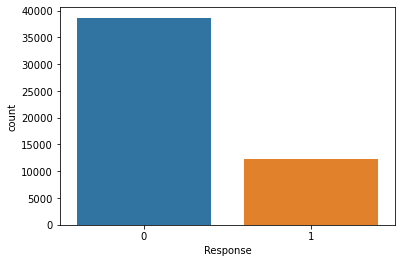

In [25]:
# viewing same with plot
sns.countplot(train['Response'])

In [ ]:
#This graph clearly shows that the customers who rejected the purchase are more compared to the customers who 
# responded yes. Hence we say that this is an imbalanced class classification problem

In [27]:
# let's check other columns also

In [28]:
train['Accomodation_Type'].value_counts(normalize=True)

Owned     0.54933
Rented    0.45067
Name: Accomodation_Type, dtype: float64

In [ ]:
# in our data there are more customers owning their own house.

In [ ]:
# let's check Accomodation_Type column and response column together 

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

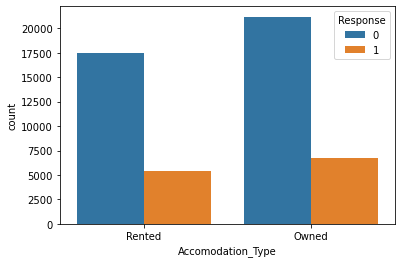

In [43]:
sns.countplot(x=train.Accomodation_Type,hue=train.Response,orient= 'v')

In [ ]:
# from this graph we can say that accomodation types makes not much difference in purchasing policy.

In [35]:
train['Reco_Insurance_Type'].value_counts(normalize=True)

Individual    0.796667
Joint         0.203333
Name: Reco_Insurance_Type, dtype: float64

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

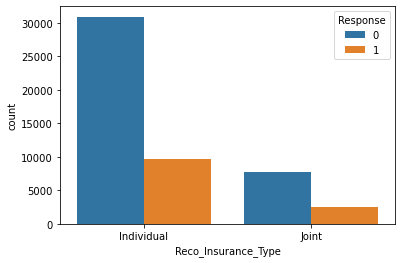

In [42]:
sns.countplot(x=train.Reco_Insurance_Type,hue=train.Response)

In [37]:
# more individual rejects policy purchasing when compared to joint (Reco_Insurance_Type)

In [38]:
train['Is_Spouse'].value_counts(normalize=True)

No     0.83448
Yes    0.16552
Name: Is_Spouse, dtype: float64

In [39]:
# let's check if having spouse have impact on customer's decision in favour of policy

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

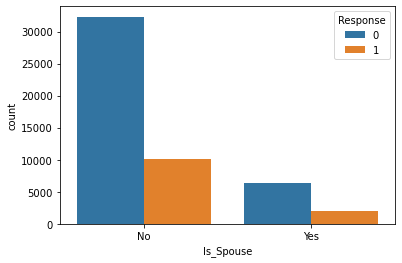

In [41]:
sns.countplot(x=train.Is_Spouse,hue=train.Response)

In [44]:
# from here we can infer that individual with no spouse is more likely to reject the policy.

<Figure size 720x360 with 0 Axes>

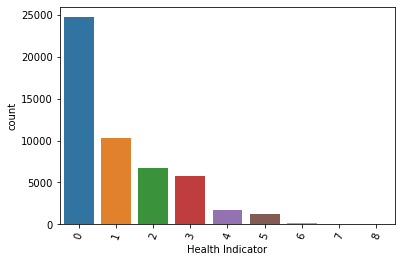

<Figure size 720x360 with 0 Axes>

In [102]:
chart = sns.countplot(train['Health Indicator'],order = train['Health Indicator'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [ ]:
# we have more responses from people having no issue with health

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='count'>

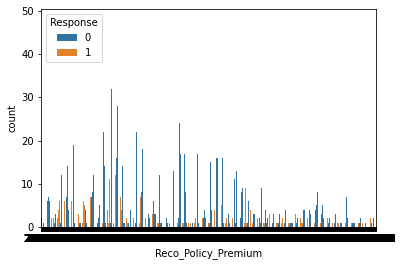

In [46]:
sns.countplot(x=train.Reco_Policy_Premium,hue=train.Response)

<AxesSubplot:ylabel='Reco_Policy_Cat'>

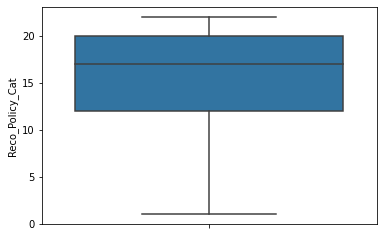

In [49]:
sns.boxplot(y=train.Reco_Policy_Cat)

In [ ]:
# There are no outlier in  Reco_Policy_Cat. infact more data point lies below 17.

<AxesSubplot:ylabel='Reco_Policy_Premium'>

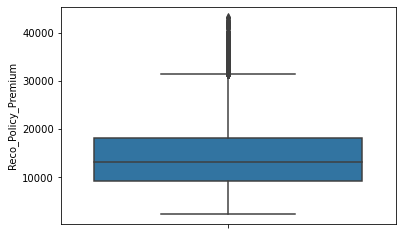

In [51]:
sns.boxplot(y=train.Reco_Policy_Premium)

In [ ]:
# from this boxplot we can conclude that mean of data point lies somewhere around 15k.

<AxesSubplot:ylabel='Upper_Age'>

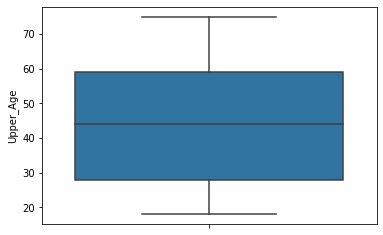

In [53]:
sns.boxplot(y=train.Upper_Age)

<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

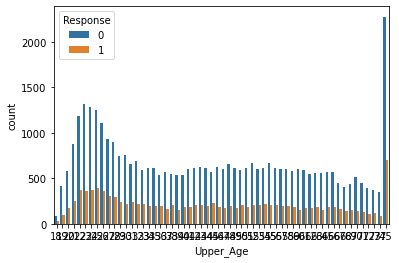

In [104]:
sns.countplot(x=train.Upper_Age,hue=train.Response)

In [ ]:
# graph clearly states that most people lies below 45 years.

<AxesSubplot:ylabel='Lower_Age'>

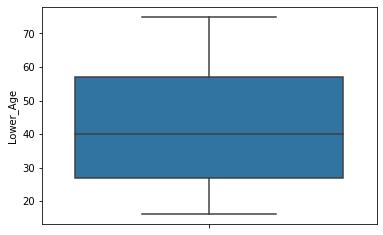

In [54]:
sns.boxplot(y=train.Lower_Age)

In [ ]:
# mean in the lower age is 40 years.

<AxesSubplot:xlabel='Lower_Age', ylabel='count'>

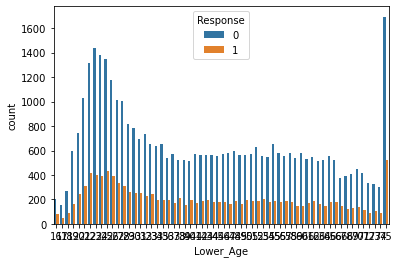

In [57]:
sns.countplot(x=train.Lower_Age,hue=train.Response)

In [58]:
train['Reco_Policy_Premium'].value_counts(normalize=True)

10080.0    0.001199
11880.0    0.001160
12060.0    0.001140
9296.0     0.001101
11520.0    0.001061
             ...   
21918.0    0.000020
23331.0    0.000020
4336.0     0.000020
31404.8    0.000020
17955.0    0.000020
Name: Reco_Policy_Premium, Length: 6977, dtype: float64

In [ ]:
!pip install category_encoders
!pip install statsmodels==0.10.0rc2 --pre --user

In [10]:
# Ordinal Columns to perform Label Encoding
columns_to_le = ["Accomodation_Type","Reco_Insurance_Type","Health Indicator"]
#Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_le:
    train[col] = le.fit_transform(train[col])

In [11]:
columns_to_oe = ["Is_Spouse"]
#Label Encoding the Nominal categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_oe)
train = oe.fit_transform(train)

In [61]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse_1,Is_Spouse_2,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,1,0,36,36,1,0,0,14+,3.000000,22,11628.0,0
1,2,C5,1117,0,1,75,22,1,0,1,1.0,2.439228,22,30510.0,0
2,3,C5,3732,0,0,32,32,1,0,0,1.0,1.000000,19,7450.0,1
3,4,C24,4378,0,1,52,48,1,0,0,14+,3.000000,19,17780.0,0
4,5,C8,2190,1,0,44,44,1,0,1,3.0,1.000000,16,10404.0,0


In [13]:
train.drop(axis=1,columns=['City_Code'],inplace=True)  # here City_Code column is dropped because it will not play any role 
# in training our model.

In [14]:
train.drop(axis=1,columns=['Region_Code'],inplace=True)

In [63]:
train.columns

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse_1', 'Is_Spouse_2',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [12]:
train["Holding_Policy_Duration"].replace("14+",15,inplace=True) # i am replacing all values with 14+ values with 15. 
# then only we will be able to use this column in machine learning algorithm.


In [15]:
train.head()

,ID,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse_1,Is_Spouse_2,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,1,0,36,36,1,0,0,15,3.000000,22,11628.0,0
1,2,0,1,75,22,1,0,1,1.0,2.439228,22,30510.0,0
2,3,0,0,32,32,1,0,0,1.0,1.000000,19,7450.0,1
3,4,0,1,52,48,1,0,0,15,3.000000,19,17780.0,0
4,5,1,0,44,44,1,0,1,3.0,1.000000,16,10404.0,0


In [16]:
# let's divide dataset in feature and label
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values

In [68]:
print(X.ndim,y.ndim)

2 1


In [69]:
train.shape

(50882, 14)

In [70]:
X.shape

(50882, 13)

In [71]:
y.shape

(50882,)

In [17]:
# now we need to separate our data set into training and testing sets therefore we need to import trainand test split module
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1, random_state = 0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1, 
                                                 random_state = 0, stratify = y)

In [18]:
from sklearn.linear_model import LogisticRegression
lregr = LogisticRegression()
lregr.fit(X,y.reshape(-1,1))  # here i made y into 2 dimensional, then only i can apply machine learing algorithm

LogisticRegression()

In [74]:
# lregr.fit(X,y.reshape(-1,1)) this is my desired model which i can use for prediction. lets predict for our x_test 
#and evaluate perfection of the model.

In [19]:
y_predict_logreg = lregr.predict(X_test)

In [77]:
# for checking how accurate the model is lets import few parameters and pass the model into these.

In [20]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, roc_curve, auc
accuracy_score(y_test,y_predict_logreg)

0.7600707408135193

In [21]:
f1_score(y_test,y_predict_logreg)

0.0

In [22]:
confusion_matrix(y_test,y_predict_logreg)

array([[3868,    0],
       [1221,    0]], dtype=int64)

In [81]:
# this confusion metrix says that in our model we have predicted 1221 customers wrongly. they might be our potential policy 
# buyers. but i will keep this model because this is the lowest no of misprediction. for other parameters
#this no keep on increasing

In [82]:
probs = lregr.predict_proba(X_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,prob_positive)
roc_auc = auc(fpr,tpr)
roc_auc

0.518748936018843

In [83]:
# now let's pass our testing dataset into this model and get predictions for that. we need to apply same data transformation 
# methods to prepare this dataset into ML algorithm.

In [84]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.000000,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.000000,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.000000,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.000000,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,2.440085,5,22534.0


In [85]:
# Ordinal Columns to perform Label Encoding
columns_to_le = ["Accomodation_Type","Reco_Insurance_Type","Health Indicator"]
#Label Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_le:
    test[col] = le.fit_transform(test[col])

In [86]:
test["Holding_Policy_Duration"].replace("14+",15,inplace=True)

In [87]:
columns_to_oe = ["Is_Spouse"]
#Label Encoding the Nominal categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_oe)
test = oe.fit_transform(test)

In [88]:
test.drop(axis=1,columns=['City_Code'],inplace=True)

In [93]:
test.head()

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse_1,Is_Spouse_2,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,156,0,0,30,30,1,0,0,6.0,3.000000,5,11934.0
1,50884,7,0,1,69,68,0,1,0,3.0,3.000000,18,32204.8
2,50885,564,1,0,28,28,1,0,2,2.0,4.000000,17,9240.0
3,50886,1177,1,0,23,23,1,0,2,3.0,3.000000,18,9086.0
4,50887,951,0,0,75,75,1,0,2,15,2.440085,5,22534.0


In [97]:
test.shape

(21805, 13)

In [94]:
test.ndim

2

In [95]:
y_predict_logreg = lregr.predict(test)

In [98]:
submission = pd.read_csv('sample_submission.csv')
final_predictions = y_predict_logreg
submission['Response'] = final_predictions
#only positive predictions for the target variable
submission['Response'] = submission['Response'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

In [ ]:
# as my model has not predicted any customer with positive reponse for the policy, i would suggest sales officer 
# to approach those customers who have:-
# 1.spouse
# 2. age lying between 35-45
# 3. rented house